# Trabalhando com diferentes formatos de arquivo com Python

Nesse notebook eu irei ler alguns dados de formatos diferentes, fazendo o uso de algumas bibliotecas da linguagem Python. Além disso, farei pequenas modificações (Excluindo uma ou várias linhas), e salvando os dados novos em um arquivo diferente.

## Importando bibliotecas

In [6]:
import os
import pandas as pd
from zipfile import ZipFile
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

## Criando os diretórios para salvar arquivos e imagens

In [ ]:
os.mkdir('./Arquivos')
os.mkdir('./Imagens')

## Pandas

### CSV

#### Lendo o dado no formato CSV

In [2]:
data_csv = pd.read_csv("Housing.csv")
data_csv.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Conferindo as estatísticas descritivas dos dados

In [3]:
data_csv.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#### Selecionando apenas as casas com 2 baneiros

In [4]:
data_csv_2_bathrooms = data_csv.query('bathrooms == 2')
data_csv_2_bathrooms.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
12,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished


#### Salvando o novo dado no formato CSV

In [5]:
data_csv_2_bathrooms.to_csv('Arquivos/housing_2_bathrooms.csv',index=False)

OSError: Cannot save file into a non-existent directory: 'Arquivos'

### JSON

#### Salvando o dataset com casas de 2 banheiros em JSON

In [ ]:
data_csv_2_bathrooms.to_json('Arquivos/housing_2_bathrooms.json')

#### Lendo o dado no formato JSON

In [ ]:
data_json = pd.read_json('Arquivos/housing_2_bathrooms.json')
data_json = data_json.reset_index(drop=True)
data_json.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
2,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
3,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
4,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished


#### Selecionando apenas as casas com ar condicionado

In [ ]:
data_airconditioning = data_json.query('airconditioning == "yes"')
data_airconditioning.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
3,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
4,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
7,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


### XLSX (Excel)

#### Salvando os dados de casas com ar condicionado no formato XLSX

In [ ]:
data_airconditioning.to_excel("Arquivos/housing_2_bathrooms_airconditioning.xlsx",sheet_name='casas_2_banheiros_ar_condicionado')

c:\Users\rafae\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\workbook\child.py:99: UserWarning: Title is more than 31 characters. Some applications may not be able to read the file
  warnings.warn("Title is more than 31 characters. Some applications may not be able to read the file")


#### Lendo os dados do arquivo XLSX

In [ ]:
data_xlsx = pd.read_excel('Arquivos/housing_2_bathrooms_airconditioning.xlsx', index_col=0)
data_xlsx.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
3,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
4,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
7,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


#### Resetando o index

In [ ]:
data_xlsx = data_xlsx.reset_index(drop=True)
data_xlsx.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
3,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
4,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


### TXT

#### Exportando os dados para TXT

In [ ]:
data_xlsx.to_csv('Arquivos/housing.txt', sep=';',index=False)

#### Lendo os dados TXT

In [ ]:
data_txt = pd.read_csv("Arquivos/housing.txt", sep=';')
data_txt.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
3,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
4,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


#### Salvando os dados no formato PARQUET

In [ ]:
data_txt.to_parquet('Arquivos/housing.parquet')

#### Lendo os dados PARQUET

In [ ]:
data_parquet = pd.read_parquet('Arquivos/housing.parquet')
data_parquet.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
3,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
4,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


### Zip

#### Zipando o arquivo housing.txt

In [ ]:
file_path = 'Arquivos/housing.txt'

with ZipFile('Arquivos/housing.zip', 'w') as zip:
    zip.write(file_path)

#### Lendo o arquivo TXT que foi Zipado (usando o ZipFile)

In [ ]:
file_path = 'Arquivos/housing.txt'

with ZipFile('Arquivos/housing.zip', 'r') as zip:
    with zip.open(file_path) as archive:

        data_zip = pd.read_csv(archive,sep=';')
    
data_zip.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
3,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
4,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


#### Lendo um arquivo TXT que foi Zipado (utilizando o método read_csv)

In [ ]:
data_zip_csv = pd.read_csv('Arquivos/housing_txt.zip', compression='zip',sep=';')
data_zip_csv.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
2,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
3,9310000,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished
4,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished


## Imagens

### Plotando um gráfico utilizando a biblioteca Seaborn

Text(0, 0.5, 'Tamanho (m²)')

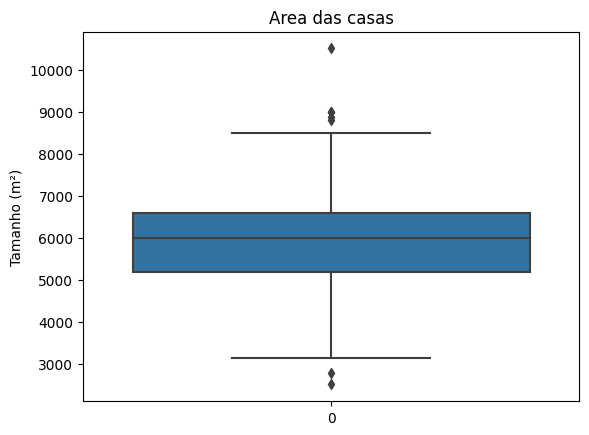

In [ ]:
fig = sns.boxplot(data=data_zip_csv['area'])
fig.set_title("Area das casas")
fig.set_ylabel("Tamanho (m²)")

### Salvando o gráfico como uma imagem jpeg

In [ ]:
sfig = fig.get_figure()
sfig.savefig('Imagens/box_plot_area.png')

### Carregando e mostrando a imagem

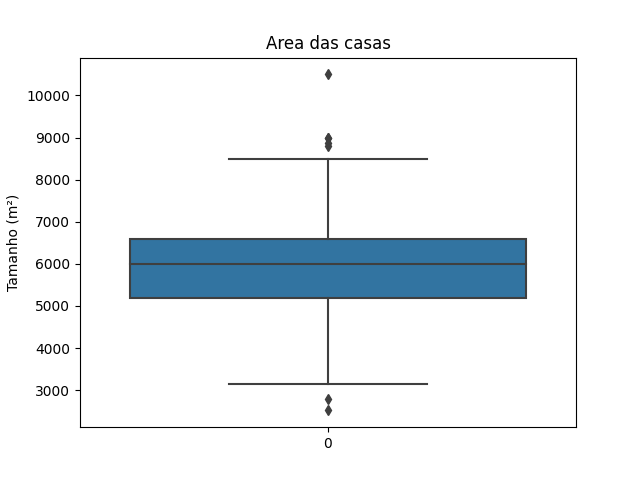

In [ ]:
image = Image.open('Imagens/box_plot_area.png')

image